In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib
import ta  # Technical indicators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

# Function to fetch stock data for multiple tickers
def get_stock_data(tickers, start="2020-01-01", end="2023-01-01"):
    data = []
    for ticker in tickers:
        df = yf.download(ticker, start=start, end=end)
        df['Ticker'] = ticker
        df['Return'] = df['Close'].pct_change()  # Percentage change for direction
        data.append(df)
    return pd.concat(data).dropna()

# Function to generate lagged features and technical indicators
def add_features(data):
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['Lag1'] = data['Close'].shift(1)
    data['Lag2'] = data['Close'].shift(2)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    data['MACD'] = ta.trend.macd_diff(data['Close'])
    data.dropna(inplace=True)
    return data

# Define tickers and fetch data
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NFLX", "ADBE"]
data = get_stock_data(tickers)
data = add_features(data)

# Define direction based on returns
data['Direction'] = np.where(data['Return'] > 0, 1, 0)  # 1 for up, 0 for down

# Prepare data for classification
X_class = data[['MA10', 'MA50', 'Lag1', 'Lag2', 'RSI', 'MACD']]
y_class = data['Direction']

# Prepare data for regression (predicting closing price)
X_reg = data[['MA10', 'MA50', 'Lag1', 'Lag2', 'RSI', 'MACD']]
y_reg = data['Close']

# Split into training and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale the features
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Train the classification model
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_class, y_train_class)
joblib.dump(rf_classifier, 'rf_classifier.pkl')
joblib.dump(scaler_class, 'scaler_class.pkl')

# Train the regression model
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
joblib.dump(rf_regressor, 'rf_regressor.pkl')
joblib.dump(scaler_reg, 'scaler_reg.pkl')

# Evaluate the models
y_pred_class = rf_classifier.predict(X_test_class)
y_pred_reg = rf_regressor.predict(X_test_reg)

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

# Regression metrics
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

# Print metrics summary
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nRegression Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

print("Models saved successfully.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Classification Metrics:
Accuracy: 0.6756
Precision: 0.6768
Recall: 0.7045
F1 Score: 0.6903

Regression Metrics:
R² Score: 0.9987
Mean Absolute Error (MAE): 3.6921
Mean Squared Error (MSE): 32.6798
Models saved successfully.


In [21]:
for i in range(0, 5):
    print(f"Predicted price: {y_pred[i]} Actual price: {y_test[i]}")

Predicted price: 217.40264724731446 Actual price: 219.27999877929688
Predicted price: 139.9588018798828 Actual price: 142.9199981689453
Predicted price: 262.99679862976075 Actual price: 268.7200012207031
Predicted price: 149.4952362060547 Actual price: 150.02000427246094
Predicted price: 133.2110973739624 Actual price: 132.42950439453125


C:\Users\Miral\AppData\Local\Temp\ipykernel_2504\3221111694.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted price: {y_pred[i]} Actual price: {y_test[i]}")


In [27]:
# For time stamps
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-06,176.380005,179.429993,176.210007,179.229996,178.317520,63841300,APPLE
2023-11-07,179.179993,182.440002,178.970001,181.820007,180.894348,70530000,APPLE
2023-11-08,182.350006,183.449997,181.589996,182.889999,181.958893,49340300,APPLE
2023-11-09,182.960007,184.119995,181.809998,182.410004,181.481339,53763500,APPLE
2023-11-10,183.970001,186.570007,183.529999,186.399994,185.695358,66133400,APPLE
...,...,...,...,...,...,...,...
2024-10-28,189.570007,190.210007,188.210007,188.389999,188.389999,27930800,AMAZON
2024-10-29,188.580002,191.460007,187.820007,190.830002,190.830002,35690200,AMAZON
2024-10-30,194.699997,195.610001,192.419998,192.729996,192.729996,37707600,AMAZON


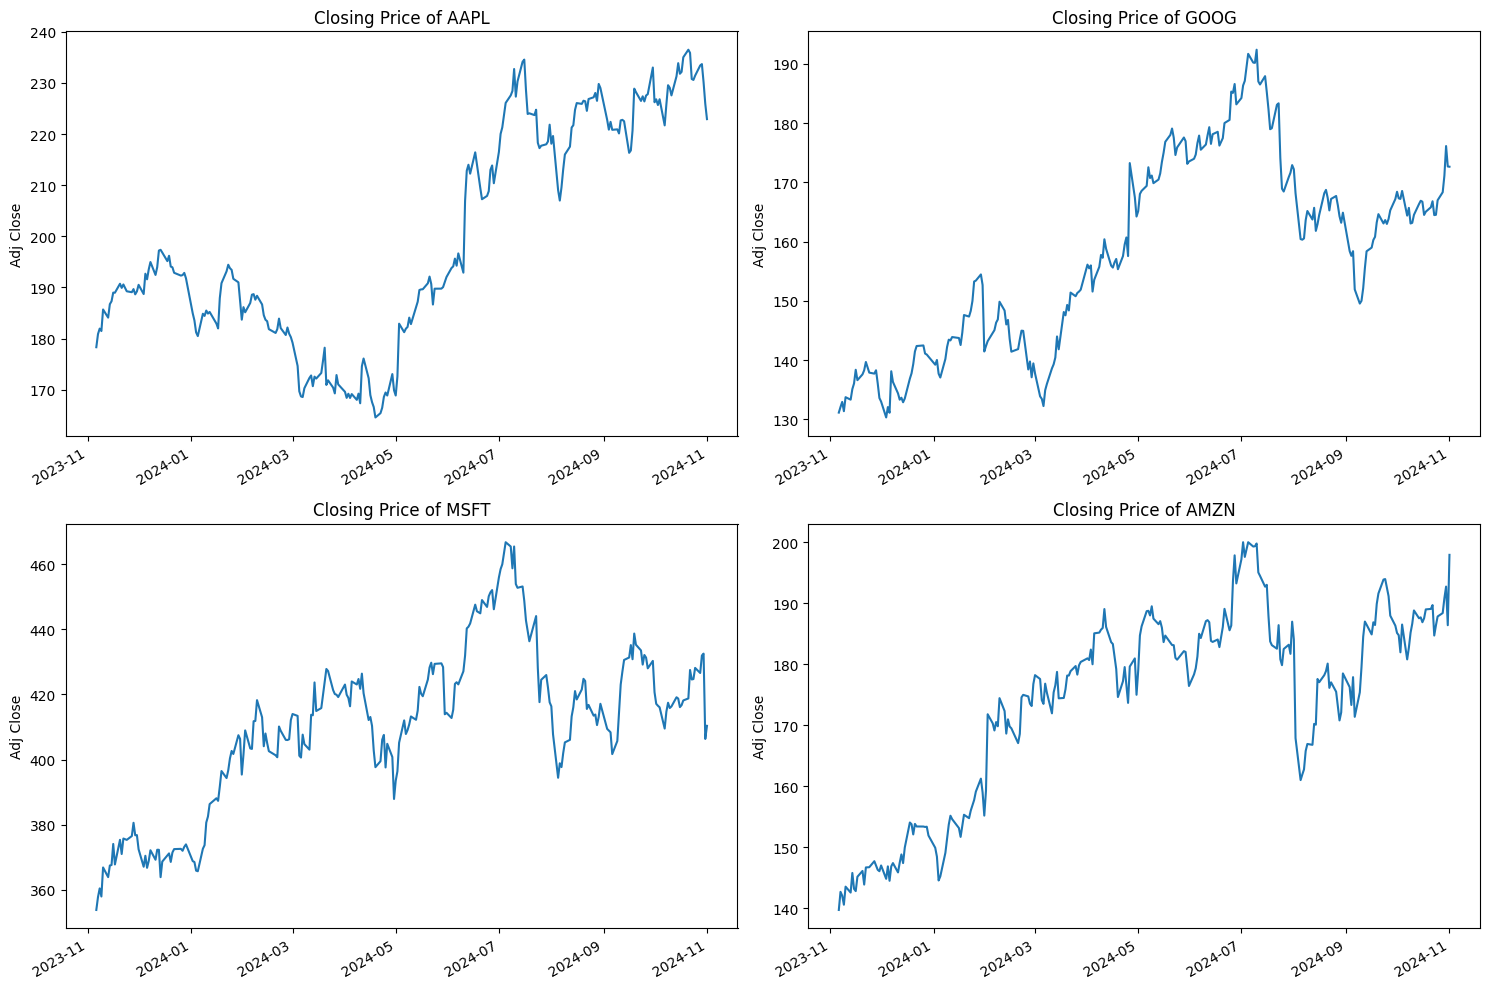

In [29]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()